## Topic 2 Energy consumption change over time in different countries

**Import Python packages and read csv file**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('owid-energy-data.csv')

Extract all the columns include "consumption" data

In [2]:
df_energy_cons_filter = df.filter(regex='consumption') 
print(list(df_energy_cons_filter.columns.values)) 

['biofuel_consumption', 'coal_consumption', 'fossil_fuel_consumption', 'gas_consumption', 'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption', 'primary_energy_consumption', 'renewables_consumption', 'solar_consumption', 'wind_consumption']


Create a new dataframe,named `df_energy_cons` composed of country information and consumption information which was copied by above output.

In [3]:
df_energy_cons = df[['iso_code','country','year','fossil_fuel_consumption','oil_consumption', 'coal_consumption', 'gas_consumption', 'hydro_consumption', 'solar_consumption', 'wind_consumption', 'nuclear_consumption','biofuel_consumption', 'low_carbon_consumption','other_renewable_consumption', 'primary_energy_consumption', 'renewables_consumption']]
print(df_energy_cons.columns)

Index(['iso_code', 'country', 'year', 'fossil_fuel_consumption',
       'oil_consumption', 'coal_consumption', 'gas_consumption',
       'hydro_consumption', 'solar_consumption', 'wind_consumption',
       'nuclear_consumption', 'biofuel_consumption', 'low_carbon_consumption',
       'other_renewable_consumption', 'primary_energy_consumption',
       'renewables_consumption'],
      dtype='object')


### 1 Different types of energy consumption change over time (global)

In [4]:
df_energy_cons_global = df_energy_cons.loc[df_energy_cons['iso_code'] == 'OWID_WRL']
df_energy_cons_global

,iso_code,country,year,fossil_fuel_consumption,oil_consumption,coal_consumption,gas_consumption,hydro_consumption,solar_consumption,wind_consumption,nuclear_consumption,biofuel_consumption,low_carbon_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption
16904,OWID_WRL,World,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
16905,OWID_WRL,World,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
16906,OWID_WRL,World,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
16907,OWID_WRL,World,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
16908,OWID_WRL,World,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17020,OWID_WRL,World,2016,130705.831,51920.156,43195.639,35590.036,10091.741,825.450,2423.694,6575.951,944.501,22239.107,1377.770,152944.938,15663.156
17021,OWID_WRL,World,2017,132512.670,52567.520,43359.508,36585.642,10164.682,1117.368,2852.430,6596.391,972.009,23160.114,1457.234,155672.784,16563.723
17022,OWID_WRL,World,2018,135807.237,53181.125,44109.462,38516.651,10367.535,1448.367,3156.845,6711.461,1040.053,24252.866,1528.605,160063.686,17541.405
17023,OWID_WRL,World,2019,136761.607,53619.925,43849.215,39292.468,10455.127,1792.996,3540.051,6923.412,1101.949,25427.562,1614.027,162194.290,18504.151


Above output shows the different types of energy consumption data from 1900 to 2020. However, we notice that some values are NaN for some reason, which could not be used for analysis. 

In [5]:
df_energy_cons_global.dropna().shape

(55, 16)

The above code gives us an information that there are only 55 rows (years) containing full data without NaN.

In [21]:
df_energy_cons_global_nona=df_energy_cons_global.dropna().rename(
    columns={
        'fossil_fuel_consumption': 'fossil_fuel', 
        'oil_consumption':'oil',
        'coal_consumption': 'coal',
        'biofuel_consumption':'biofuel',
        'gas_consumption':'gas',
        'hydro_consumption':'hydro',
        'low_carbon_consumption':'low_carbon',
        'nuclear_consumption':'nuclear',
        'other_renewable_consumption':'other_renewable',
        'primary_energy_consumption':'primary_energy',
        'renewables_consumption':'renewables',
        'solar_consumption':'solar',
        'wind_consumption':'wind'
    })

df_energy_cons_global_nona['total_renewables'] = df_energy_cons_global_nona.iloc[:,7:13].sum(axis=1)

df_energy_cons_global_nona['nonrenewable_energy'] = df_energy_cons_global_nona.iloc[:,3:6].sum(axis=1)

df_energy_cons_global_nona['total'] = df_energy_cons_global_nona.iloc[:,16] + df_energy_cons_global_nona.iloc[:,17]



In [22]:
print(df_energy_cons_global_nona[['total_renewables', 'renewables']])

       total_renewables  renewables
16969          5320.728    2614.400
16970          5711.967    2787.844
16971          5870.794    2849.250
16972          6235.906    3003.916
16973          6639.759    3180.561
16974          7035.388    3334.283
16975          7503.944    3485.959
16976          8065.252    3651.413
16977          8460.860    3708.599
16978          9526.921    4070.069
16979         10199.896    4120.485
16980         10527.990    4115.547
16981         11391.680    4256.209
16982         12564.837    4603.776
16983         13161.899    4837.128
16984         13712.677    4947.360
16985         14645.802    5061.306
16986         15243.292    5173.054
16987         16364.606    5405.069
16988         17966.679    5603.993
16989         19487.063    5715.680
16990         20245.855    5811.962
16991         21191.500    5904.325
16992         22430.308    6092.626
16993         22709.283    6096.758
16994         23660.368    6435.785
16995         24501.549    6

In [23]:
print(df_energy_cons_global_nona[['total', 'primary_energy','nonrenewable_energy','total_renewables']])

            total  primary_energy  nonrenewable_energy  total_renewables
16969   80122.200       43247.517            74801.472          5320.728
16970   84221.923       45582.596            78509.956          5711.967
16971   87147.645       47298.513            81276.851          5870.794
16972   92233.496       50179.728            85997.590          6235.906
16973   98224.451       53571.509            91584.692          6639.759
16974  104183.557       56946.457            97148.169          7035.388
16975  108137.778       59265.924           100633.834          7503.944
16976  113991.244       62481.338           105925.992          8065.252
16977  120665.596       66078.908           112204.736          8460.860
16978  121092.194       66434.173           111565.273          9526.921
16979  121806.950       66793.977           111607.054         10199.896
16980  128319.464       70403.161           117791.474         10527.990
16981  133064.186       72985.271           121672.

 Note: 
 
 * 'renewables' includes powers from solar, wind, hydro and other renewables.
 
 * Calculated 'total_renewables' include both 'renewables' and powers from nulear, biofuel, low-carbon.
 
 * 'nonrenewable_energy'includes energy from fossil_fuel, oil_consumption, coal and gas.
 
 * 'Other renewables' refers to renewable sources including geothermal, biomass, waste, wave and tidal. 
 
 * Biofuel production includes both bioethanol and biodiesel.

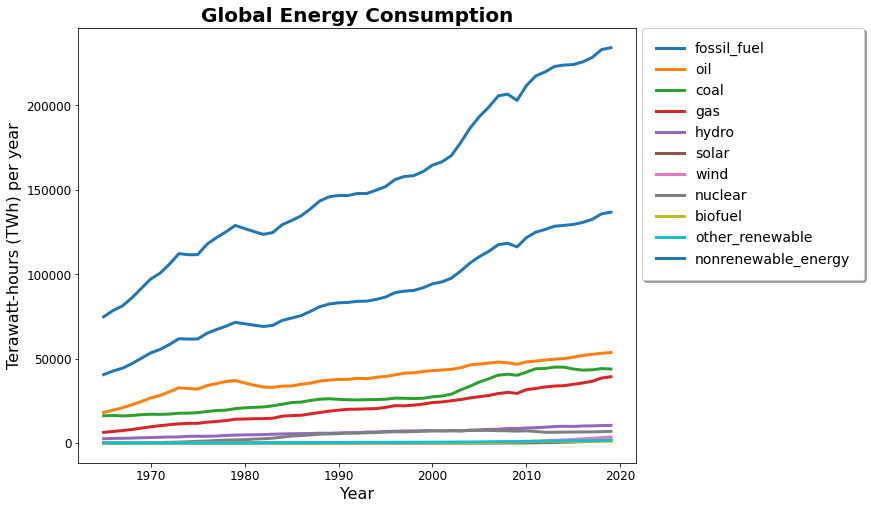

In [24]:
df_energy_cons_global_nona.drop(['primary_energy', 'renewables', 'low_carbon','total_renewables','total'], axis=1).plot(
    x='year',
    figsize=(10,8),
    linewidth = 3
)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel('Terawatt-hours (TWh) per year', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Global Energy Consumption', fontsize=20, fontweight="bold")
plt.legend(fontsize=14,
           frameon=True,
           bbox_to_anchor=(1.01, 1), 
           loc='upper left', 
           borderaxespad=0.,
           fancybox=True, 
           framealpha=1, 
           shadow=True, 
           borderpad=1)

plt.show()

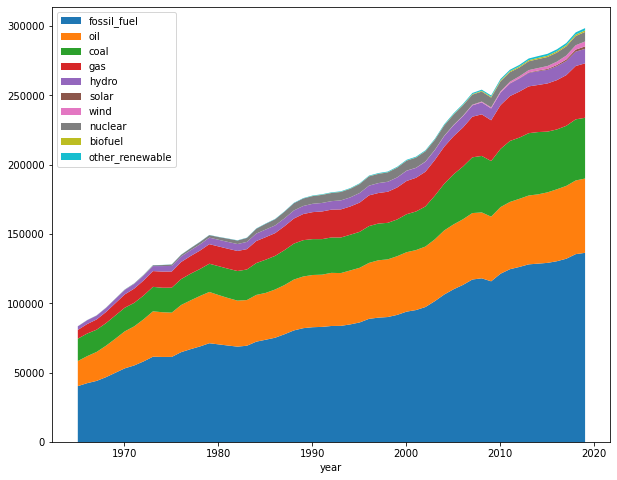

In [11]:
df_energy_cons_global_nona.drop(['primary_energy', 'renewables', 'low_carbon', 'total_renewables','total'], axis=1).plot.area(
    x='year',
    figsize=(10,8),
    linewidth=0
)
plt.show()

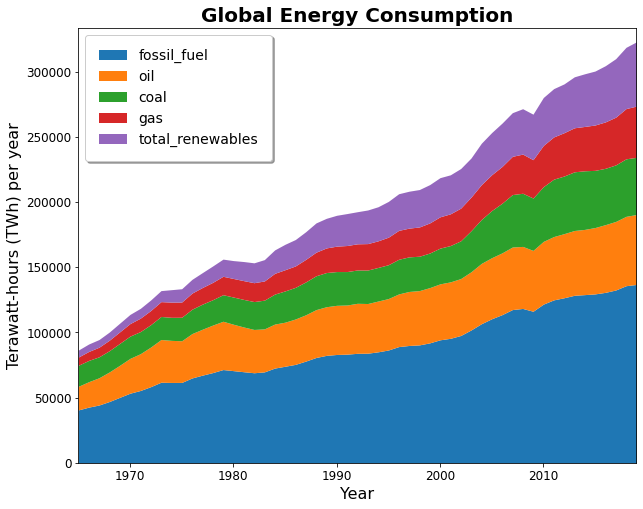

283471.844


In [27]:
df_energy_cons_global_nona.plot.area(
    x='year',
    y=['fossil_fuel',
    'oil',
    'coal',
    'gas',
    'total_renewables'],
    figsize=(10,8),
    linewidth=0
)

plt.tick_params(axis='both', which='major', labelsize=12)

year_min = df_energy_cons_global_nona['year'].min()
year_max = df_energy_cons_global_nona['year'].max()
y_min = 0
y_max = df_energy_cons_global_nona['total'].max() + 50000

plt.axis([year_min, year_max, y_min, y_max])
plt.ylabel('Terawatt-hours (TWh) per year', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Global Energy Consumption', fontsize=20, fontweight="bold")
plt.legend(fontsize=14,
           frameon=True,
           #bbox_to_anchor=(1.01, 1), 
           #loc='upper left', 
           borderaxespad=0.5,
           fancybox=True, 
           framealpha=1, 
           shadow=True, 
           borderpad=1)

plt.show()

print(df_energy_cons_global_nona['total'].max())

283471.844


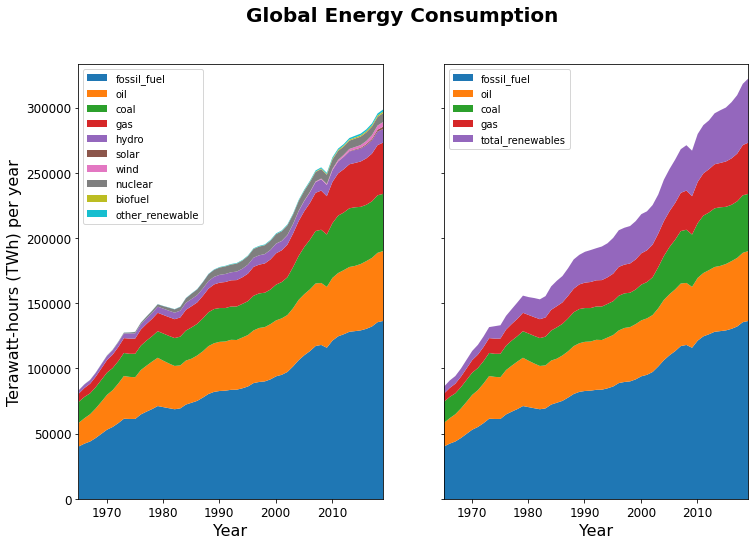

In [43]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,8))
fig.suptitle('Global Energy Consumption', fontsize=20, fontweight="bold")

#plt.subplot(121)
df_energy_cons_global_nona.drop(
    ['primary_energy', 
     'renewables', 
     'low_carbon',
     'total_renewables',
     'nonrenewable_energy',
     'total'], 
    axis=1).plot.area(
    ax=ax1,
    x='year',
    linewidth=0
)

year_min = df_energy_cons_global_nona['year'].min()
year_max = df_energy_cons_global_nona['year'].max()
y_min = 0
y_max = df_energy_cons_global_nona['total'].max() + 50000

ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.axis([year_min, year_max, y_min, y_max])
ax1.set_ylabel('Terawatt-hours (TWh) per year', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.legend()

#plt.subplot(122)
df_energy_cons_global_nona.plot.area(
    ax=ax2,
    x='year',
    y=['fossil_fuel',
    'oil',
    'coal',
    'gas',
    'total_renewables'],
    linewidth=0
)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.axis([year_min, year_max, y_min, y_max])
ax2.set_ylabel('Terawatt-hours (TWh) per year', fontsize=16)
ax2.set_xlabel('Year', fontsize=16)
ax2.legend()

#plt.show()

print(df_energy_cons_global_nona['total'].max())

In [ ]:
plt.subplot(121)
plt.plot(range(12))
plt.subplot(122, facecolor='y') # creates 2nd subplot with yellow background
plt.plot(range(12))

In [ ]:
min = df_energy_cons_global_nona['year'].min()
print(min)

In [ ]:
import sqlite3
con_cons = sqlite3.connect('energy_cons_global.db')
df_energy_cons.to_sql('energy_cons_global', con_cons)

In [ ]:
%load_ext sql
%sql sqlite:////Users/jingai/workspace/energy-data/energy_cons_global.db

In [ ]:
%%sql
SELECT COUNT(iso_code)
FROM 'energy_cons'
WHERE 

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np

# create data
values=np.cumsum(np.random.randn(1000,1))

# use the plot function
plt.plot(values)